# SVM Train and predict with one mechanism 
This workbook is a study in training and evaluating one mechanism from the SVM study. 
[See the main SVM workbook](SVM%20-%20Quick%20and%20Dirty.ipynb)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandasql import sqldf
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader import ProfileReader
from pandas import DataFrame as pdf

pd.options.display.max_rows = 5
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [2]:
pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
# read in data.
# row indices are mechanism, agent, concentration
data = pr.parse_profiles(keep_column_names=True, drop_profiles=True)

In [3]:
data.head()

BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR  \
mech                  agent          conc                                               
AhR agonist            FICZ           1000 nM                                0.031453   
                                      111.1 nM                               0.032902   
                                      333.3 nM                               0.023110   
                                      37 nM                                  0.031829   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                             -0.035647   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10  \
mech                  agent          conc                                                  
AhR agonist            FICZ           1000 nM                                   0.020148   
                                      111.1 nM                                  0.010241   
                                      333.3 nM                                 -0.003607   
                                      37 nM                                    -0.008869   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                                -0.006448   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG  \
mech                  agent          conc                                               
AhR agonist            FICZ           1000 nM                               -0.006715   
                                      111.1 nM                              -0.004796   
                                      333.3 nM                              -0.002454   
                                      37 nM                                 -0.003555   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                              0.012811   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR  \
mech                  agent          conc                                            
AhR agonist            FICZ           1000 nM                            -0.027737   
                                      111.1 nM                            0.023030   
                                      333.3 nM                            0.019399   
                                      37 nM                               0.011887   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                           0.014311   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha  \
mech                  agent          conc                                               
AhR agonist            FICZ           1000 nM                               -0.022183   
                                      111.1 nM                               0.029068   
                                      333.3 nM                               0.038214   
                                      37 nM                                  0.030835   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                             -0.027989   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1  \
mech                  agent          conc                                           
AhR agonist            FICZ           1000 nM                            0.110827   
                                      111.1 nM                           0.095447   
                                      333.3 nM                           0.095619   
                                      37 nM                              0.090178   
Calcineurin inhibitor  Cyclosporin A  1111.1 nM                         -0.085317   

                                                 BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I  \
mech                  agent          conc                                           
AhR agonist            FICZ           1000 nM                           -0.112386   
                                      111.1 nM                          -0.076

In [4]:
print('Select Mechanism with greatest count ')
# Select Mechanism with greatest count 
pqry('''SELECT mech, count(mech) count FROM data m group by mech order by count(mech) desc LIMIT 1;''')


Select Mechanism with greatest count 


,mech,count
0,mTOR inhibitor,27


In [5]:
# Check if imputed Impute missing
display(data[75:80])
# Impute missing
grouped = data.groupby(data.index.get_level_values(0).values)
f = lambda x: x.fillna(x.mean())
data = grouped.transform(f)
display(data[75:80])


BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                              -0.076612   
                Trichostatin A  1111.1 nM                                   NaN   
                                3333.3 nM                                   NaN   
                                370.4 nM                              -0.093244   
                Vorinostat      10000 nM                                    NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10  \
mech           agent           conc                                                  
HDAC inhibitor  Scriptaid       370.4 nM                                  0.034877   
                Trichostatin A  1111.1 nM                                      NaN   
                                3333.3 nM                                      NaN   
                                370.4 nM                                  0.005962   
                Vorinostat      10000 nM                                       NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                              -0.000263   
                Trichostatin A  1111.1 nM                                   NaN   
                                3333.3 nM                                   NaN   
                                370.4 nM                               0.005285   
                Vorinostat      10000 nM                                    NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR  \
mech           agent           conc                                            
HDAC inhibitor  Scriptaid       370.4 nM                           -0.043693   
                Trichostatin A  1111.1 nM                                NaN   
                                3333.3 nM                                NaN   
                                370.4 nM                           -0.008409   
                Vorinostat      10000 nM                                 NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                               0.000339   
                Trichostatin A  1111.1 nM                                   NaN   
                                3333.3 nM                                   NaN   
                                370.4 nM                              -0.007849   
                Vorinostat      10000 nM                                    NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1  \
mech           agent           conc                                           
HDAC inhibitor  Scriptaid       370.4 nM                          -0.027887   
                Trichostatin A  1111.1 nM                               NaN   
                                3333.3 nM                               NaN   
                                370.4 nM                          -0.039351   
                Vorinostat      10000 nM                                NaN   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I  \
mech           agent           conc                                           
HDAC inhibitor  Scriptaid       370.4 nM                           0.014458   
                Trichostatin A  1111.1 nM                               NaN   
                                3333.3 nM                               NaN   
                                370.4 nM                           0.000786   
                Vorinostat      10000 nM                                NaN   

                         

BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                              -0.076612   
                Trichostatin A  1111.1 nM                             -0.186497   
                                3333.3 nM                             -0.186497   
                                370.4 nM                              -0.093244   
                Vorinostat      10000 nM                              -0.186497   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10  \
mech           agent           conc                                                  
HDAC inhibitor  Scriptaid       370.4 nM                                  0.034877   
                Trichostatin A  1111.1 nM                                 0.023446   
                                3333.3 nM                                 0.023446   
                                370.4 nM                                  0.005962   
                Vorinostat      10000 nM                                  0.023446   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                              -0.000263   
                Trichostatin A  1111.1 nM                              0.001110   
                                3333.3 nM                              0.001110   
                                370.4 nM                               0.005285   
                Vorinostat      10000 nM                               0.001110   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR  \
mech           agent           conc                                            
HDAC inhibitor  Scriptaid       370.4 nM                           -0.043693   
                Trichostatin A  1111.1 nM                          -0.037827   
                                3333.3 nM                          -0.037827   
                                370.4 nM                           -0.008409   
                Vorinostat      10000 nM                           -0.037827   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha  \
mech           agent           conc                                               
HDAC inhibitor  Scriptaid       370.4 nM                               0.000339   
                Trichostatin A  1111.1 nM                             -0.040364   
                                3333.3 nM                             -0.040364   
                                370.4 nM                              -0.007849   
                Vorinostat      10000 nM                              -0.040364   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1  \
mech           agent           conc                                           
HDAC inhibitor  Scriptaid       370.4 nM                          -0.027887   
                Trichostatin A  1111.1 nM                         -0.088252   
                                3333.3 nM                         -0.088252   
                                370.4 nM                          -0.039351   
                Vorinostat      10000 nM                          -0.088252   

                                           BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I  \
mech           agent           conc                                           
HDAC inhibitor  Scriptaid       370.4 nM                           0.014458   
                Trichostatin A  1111.1 nM                          0.048351   
                                3333.3 nM                          0.048351   
                                370.4 nM                           0.000786   
                Vorinostat      10000 nM                           0.048351   

                         

In [6]:
# read in list of mechanisms:
mechanisms = pqry('''SELECT distinct mech from data''').values.ravel()

In [7]:
# Generate positive class from current mechanism
# set mechanism under study. We can look over other mechanisms on this model.
mechanism = 'mTOR inhibitor'

# establish positive class data. We'll compare this against the negative class generated as random profiles.
pos_class = data.loc[[mechanism]] # select mechanism
pos_class.reset_index(level=0, inplace=True) # turn index into label column
pos_class



mech  BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR  \
agent         conc                                                             
 Everolimus    0.46 nM  mTOR inhibitor                             -0.025125   
               1.4 nM   mTOR inhibitor                              0.006904   
...                                ...                                   ...   
 Temsirolimus  4.6 nM   mTOR inhibitor                             -0.018998   
               41.2 nM  mTOR inhibitor                             -0.033428   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10  \
agent         conc                                                
 Everolimus    0.46 nM                                 0.029661   
               1.4 nM                                  0.039618   
...                                                         ...   
 Temsirolimus  4.6 nM                                  0.004109   
               41.2 nM                                -0.026309   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG  \
agent         conc                                             
 Everolimus    0.46 nM                              0.007285   
               1.4 nM                              -0.000508   
...                                                      ...   
 Temsirolimus  4.6 nM                              -0.018434   
               41.2 nM                              0.001701   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR  \
agent         conc                                          
 Everolimus    0.46 nM                          -0.007217   
               1.4 nM                            0.002662   
...                                                   ...   
 Temsirolimus  4.6 nM                           -0.027802   
               41.2 nM                          -0.034608   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha  \
agent         conc                                             
 Everolimus    0.46 nM                             -0.018684   
               1.4 nM                               0.000308   
...                                                      ...   
 Temsirolimus  4.6 nM                              -0.068272   
               41.2 nM                              0.002036   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1  \
agent         conc                                         
 Everolimus    0.46 nM                         -0.035632   
               1.4 nM                          -0.035865   
...                                                  ...   
 Temsirolimus  4.6 nM                          -0.085786   
               41.2 nM                         -0.028647   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I  \
agent         conc                                         
 Everolimus    0.46 nM                          0.073062   
               1.4 nM                           0.048610   
...                                                  ...   
 Temsirolimus  4.6 nM                          -0.005155   
               41.2 nM                          0.053385   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:SRB  \
agent         conc                                       
 Everolimus    0.46 nM                       -0.004618   
               1.4 nM                        -0.003049   
...                                                ...   
 Temsirolimus  4.6 nM                        -0.003486   
               41.2 nM                       -0.018630   

                        BrEPI_IL-1b/TNF-a/IFN-g_24:tPA  \
agent         conc                                       
 Everolimus    0.46 nM                       -0.026744   
               1.4 nM                        -0.061801   
...                                                ...   
 Temsirolimus  4.6 nM                        -0.137305   
               41.2 nM                       -0.086014   

                     

### Generate Random profile
We need negative class data to train the model [See random Profiles example](Print Random Profiles.ipynb)

In [8]:
# Generate negative class
# Initialize the random profile genearator with sig env values and profile data file for S:M
#random_profile_number = 317
random_profile_number=len(pos_class)
envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
np.random.seed(42) # ensure reprodicble results

rpg = RandomProfileGenerator(envelope_file='data\\SigEnvelopeFile.xml', data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx')
neg_values = rpg.get_random_profiles(prof_num=random_profile_number, envelope=envelope,conf=conf, dist='rand')
neg_mech = pd.DataFrame({'mech': ['neg_class' for s in range(random_profile_number)]})
neg_class = pd.concat([neg_mech, neg_values], axis=1)
#neg_class 

In [9]:
neg_class

,mech,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,neg_class,-0.014481,0.061243,0.014708,0.012421,-0.032603,-0.034311,-0.052341,0.029572,0.012267,0.024161,-0.063475,0.074368,0.041469,-0.012646,-0.019924,-0.044767,-0.021694,0.002017,-0.010110,-0.030447,0.013031,-0.050716,-0.031158,-0.009651,-0.003208,0.027993,-0.029456,0.001257,0.010493,-0.041101,0.012363,-0.026688,-0.061328,0.071831,0.044039,0.032721,-0.029871,-0.058442,0.021868,-0.005018,-0.070240,-0.000566,-0.046589,0.047997,-0.035773,0.022227,-0.030424,0.001737,0.003670,-0.042362,0.043737,0.026451,0.033639,0.036174,0.011268,0.025026,-0.037069,-0.030712,-0.045495,-0.013743,-0.010429,-0.026510,0.029409,-0.023988,-0.020623,0.003572,-0.053933,0.042513,-0.041915,0.072459,0.033040,-0.028315,-0.066171,0.042139,0.025944,0.018902,0.017

In [10]:
# Generate all classes by combining positive and negative classes
all_class = pd.concat([pos_class, neg_class]).reset_index(drop=True)
# encode mechanism to int values
all_class['mech'] = all_class['mech'].map({mechanism: 1, 'neg_class':0})

In [11]:
all_class

,mech,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,1,-0.025125,0.029661,0.007285,-0.007217,-0.018684,-0.035632,0.073062,-0.004618,-0.026744,0.023235,0.027208,-0.051157,-0.029659,0.001539,0.000379,-0.080849,-0.048609,-0.007124,-0.096828,-0.106795,-0.018441,-0.067720,0.005005,0.000103,0.004785,-0.023476,-0.036917,-0.007017,0.025684,0.019521,-0.033865,0.002584,0.070305,-0.021818,0.024542,-0.012663,-0.051909,-0.008576,0.157562,-0.055633,0.040063,-0.046986,-0.059191,-0.040126,0.047702,0.002455,-0.025488,-0.000264,-0.018294,-0.060604,-0.065437,-0.035152,0.013511,0.020058,0.025089,0.000734,0.012278,-0.063808,-0.042104,0.007731,-0.023541,-0.245918,-0.069942,-0.099983,-0.016990,0.014641,-0.061335,-0.009421,-0.075236,-0.043245,0.006529,-0.008190,-0.008398,-0.034474,-0.036601,0.013737,0.054

In [12]:
X = all_class.iloc[:,1:]
Y = all_class.iloc[:,0]

# scale that data
# http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

# scale profiles with standard scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
# X = scaler.fit_transform(X)

from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l2') # l1, l2, max
X = scaler.fit_transform(X)

In [13]:
# test train split
from sklearn.model_selection import train_test_split


# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.1, 
                                                    random_state = 42,
                                                    stratify = Y # startify, so we get the same proportion in train and test
                                                   )

# Split the training data into cross validation and training 
X_train, X_cv, y_train, y_cv = train_test_split(    X_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y_train # startify, so we get the same proportion in train and test
                                                   )



#features_train, features_cv, labels_train, labels_cv = train_test_split(features_train, 
#                                                                            labels_train, 
#                                                                            test_size = 0.1, 
#                                                                            random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
#print("Cross validation set has {} samples.".format(features_cv.shape[0]))
print("Cross validation set has {} samples.".format(X_cv.shape[0]))



Training set has 38 samples.
Cross validation set has 10 samples.


In [14]:
print("Proportion of positive class in training set: ", sum(y_train) / len(y_train))
print("Proportion of positive class in cross validation set: {}".format(sum(y_cv) / len(y_cv)))

Proportion of positive class in training set:  0.5
Proportion of positive class in cross validation set: 0.5


In [15]:
# Naive Predictor
model_pred = np.ones(len(Y), dtype=int)

TP = np.sum(Y) # Counting the ones as this is the naive case.
FP = Y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = TP / float(TP + FP) 
recall = TP / float(TP + FN)
precision = TP / float(TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
from sklearn.metrics import fbeta_score
fscore =  fbeta_score(Y, model_pred, beta=0.5)

# Print the results 
print( "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5000, F-score: 0.5556]


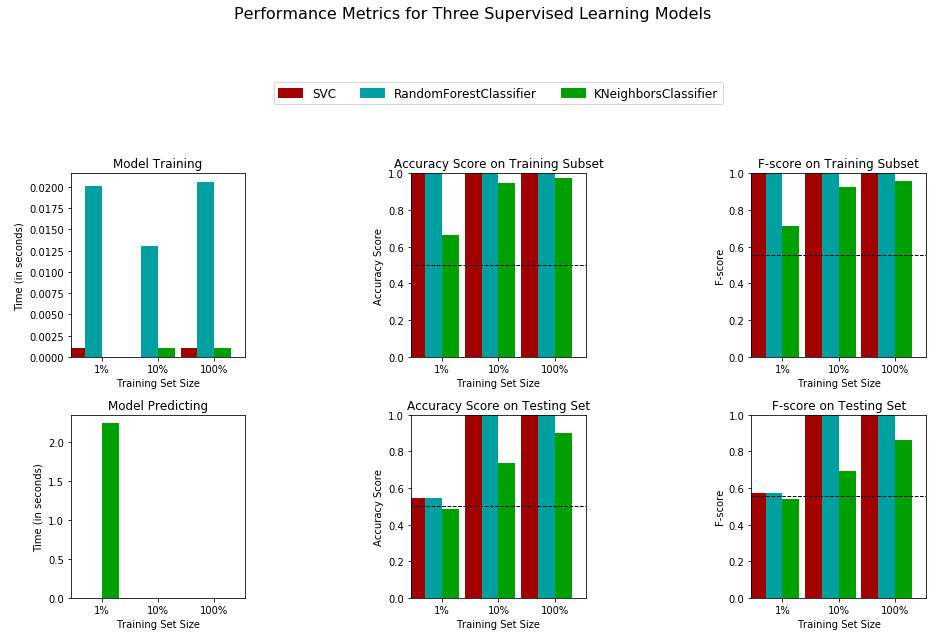

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scripts.visuals as vs

# Initialize the three models
clf_A = SVC(kernel='linear')
clf_B = RandomForestClassifier(random_state=0) 
clf_C = KNeighborsClassifier(n_neighbors=3)
#clf_C = DecisionTreeClassifier(random_state=0)
#clf_C = RandomForestClassifier(random_state=0)


# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = 1.0
samples_10 = 0.5
samples_1 = 0.1

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        vs.train_predict2(clf, samples, X_train, y_train, X_cv, y_cv)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate2(results, accuracy, fscore)

In [17]:
# GridSearch
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)
#parameters = { 'C':[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
parameters = { 'C':[0.1, 0.5, 1.0, 2.0, 5.0]}


# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(fbeta_score, beta=0.5)


# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print ( "Unoptimized model\n------")
print ( "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ( "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ( "\nOptimized Model\n------")
print ( "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ( "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ( "grid_fit.best_params_:", grid_fit.best_params_)

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
grid_fit.best_params_: {'C': 0.1}


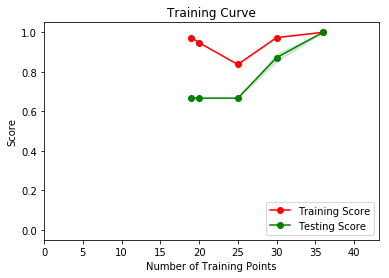

In [18]:
from sklearn.model_selection import StratifiedKFold
import sklearn.model_selection as curves

import matplotlib.pyplot as plt


K = 2
data_size = random_profile_number + len(pos_class)

ts_min = (len(neg_class) + 1) / K


cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)
train_sizes=[ 19, 20, 25, 30, 36]
#train_sizes=[19, 20, 25, 30, 36, 100, 200, 229]


#train_sizes, train_scores, valid_scores = learning_curve( best_clf, X, Y, cv = sk, train_sizes=[ 20, 50, 75, 84])

 # Calculate the training and testing scores
sizes, train_scores, test_scores = curves.learning_curve(best_clf, X, Y, 
                                                         #cv = cv, 
                                                         train_sizes = train_sizes, 
                                                         scoring = 'f1') # f1

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


# Subplot the learning curve 
ax = plt.subplot()
ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Labels
ax.set_title('Training Curve')
ax.set_xlabel('Number of Training Points')
ax.set_ylabel('Score')
ax.set_xlim([0, X.shape[0]*0.8])
ax.set_ylim([-0.05, 1.05])

# Visual aesthetics
plt.legend(loc = 'lower right')
plt.ylim([-0.05,1.05])
plt.show()

### Analysis
Looking at the learning curve, the model could benefit from more training examples. [learning-curve](http://scikit-learn.org/stable/modules/learning_curve.html#learning-curve.) The training and testing scores are both very close which may indicate overfitting due to few data points.

The plot below show the weights assigned to each feature by the SVM mechanism. The sums of the weights don't have to add up to one, and it is their absolute value that indicates relevance. 

In [19]:
coef_data = pd.DataFrame({'Features': data.columns.values,'Coefs': abs(best_clf.coef_[0])})
coef_data.sort_values('Coefs', ascending=False, inplace=True)
coef_data.reset_index(inplace=True, drop=True)

cd = pd.DataFrame({'Features': data.columns.values, 'Coef': abs(best_clf.coef_[0])})
cd = cd[['Features', 'Coef']].sort_values('Coef', ascending=False).reset_index()
cd['CumSum'] = (cd['Coef'] / sum(cd['Coef'])).cumsum()

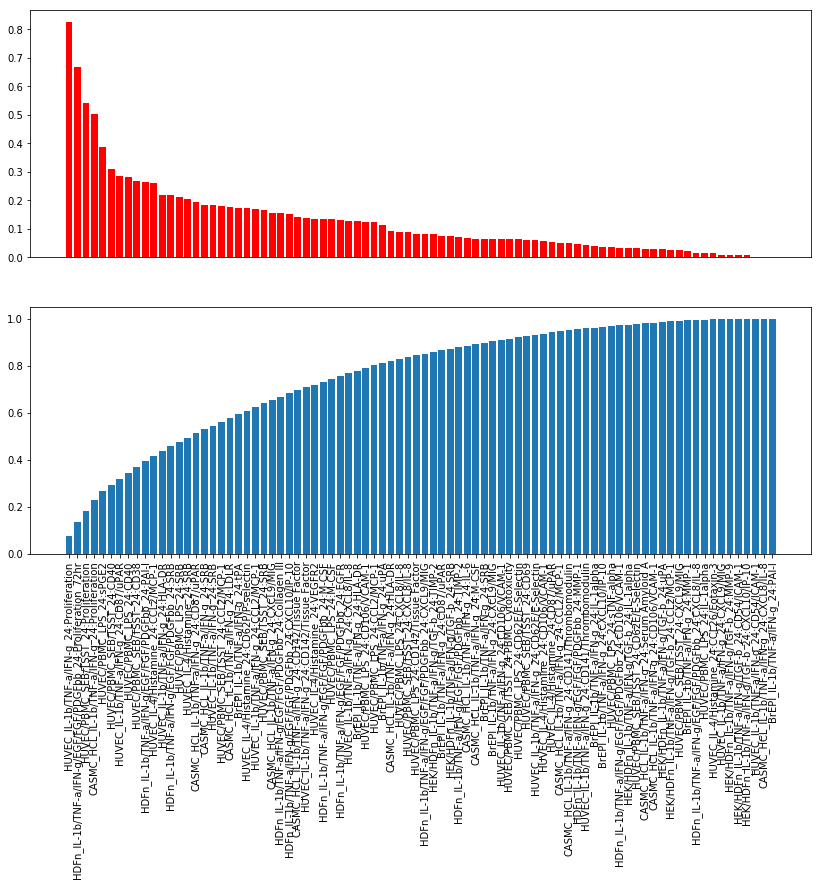

In [20]:
plt.subplots(1,2, sharex=True, figsize=(14,10))
plt.subplot(211)
plt.bar(data=coef_data, x='Features', height='Coefs', color='r');
plt.xticks([]);

plt.subplot(212)
plt.bar(data=cd, x='Features', height='CumSum');
plt.xticks(rotation='vertical');

# Predict TOXCast profiles
In this section we validate the model against Supplemental Table 5 in the JBS paper. We read in the target profiles, match the columns, report mismatched columns, drop excess columns in the target and fill in missing ones with "noise".

In [21]:
# predict a negative class
target_mechanism = 'mTOR inhibitor'


In [22]:
# read in profiles to be classified:
pr = ProfileReader(data_file='Validation/Berg JBS 2013 Supplemental Table 5 - Profiles.xlsx')
# read in data. Make column 2-level index, level 0 is system, level 1 ir readout
# row indices are mechanism, agent, concentration
tox_cast = pr.parse_profiles(keep_column_names=True, drop_profiles=False)
tox_cast.reset_index(level=0, inplace=True, drop=True)

In [23]:
target_profile_names = tox_cast.iloc[:,0]

##########################
# process unknown target #
# ########################
# Note: The model was trained with data from 'SMC_IL-1b/TNF-a/IFN-g_24' system.
# In the TOXCast data set the this was replaced with 'CASMC_HCL_IL-1b/TNF-a/IFN-g_24' in feature names and
# can be used in place of 'SMC_IL-1b/TNF-a/IFN-g_24'.

# Replace target data 'CASMC_HCL_IL-1b/TNF-a/IFN-g_24' => 'SMC_IL-1b/TNF-a/IFN-g_24'
renamed = {s: s.replace('SMC_IL-1b/TNF-a/IFN-g_24', 'CASMC_HCL_IL-1b/TNF-a/IFN-g_24') for s in tox_cast.columns.values if s.startswith('SMC_IL-1b/TNF-a/IFN-g_24')}
tox_cast.rename(columns=renamed, inplace=True)

# align columns
tox_cast = tox_cast[[tox_cast.columns.values[0], *data.columns.values]]

unknown = tox_cast.iloc[:, 1:] # remove profile names column for numerical calculations

# drop excess columns in unknown
cols_not_in_model = list(set(unknown.columns.values) - set(data.columns.values))
print("{} Target columns not in Model, dropping: ".format(len(cols_not_in_model)))
display(list(np.sort(cols_not_in_model)))
unknown = unknown.drop(columns=cols_not_in_model, inplace=False)
 
# fill in missing columns with noise? No, don't use profiles with missing data!
cols_not_in_target = list(set(data.columns.values) - set(unknown.columns.values))
print("{} Missing columns from Target: ".format(len(cols_not_in_target)))
display(list(np.sort(cols_not_in_target)))


print("target data shape:", unknown.shape)
unknown.head()
# report missing values

0 Target columns not in Model, dropping: 


[]

0 Missing columns from Target: 


[]

target data shape: (363, 84)


BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR  \
agent                  conc                                              
 6-Deisopropylatrazine  40000 nM                                 0.074   
 Acetochlor             40000 nM                                 0.037   
                        13000 nM                                 0.067   
 Alachlor               40000 nM                                 0.050   
                        13000 nM                                 0.132   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10  \
agent                  conc                                                 
 6-Deisopropylatrazine  40000 nM                                   -0.023   
 Acetochlor             40000 nM                                   -0.124   
                        13000 nM                                   -0.052   
 Alachlor               40000 nM                                   -0.131   
                        13000 nM                                    0.011   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG  \
agent                  conc                                              
 6-Deisopropylatrazine  40000 nM                                -0.010   
 Acetochlor             40000 nM                                -0.022   
                        13000 nM                                -0.008   
 Alachlor               40000 nM                                -0.008   
                        13000 nM                                -0.006   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR  \
agent                  conc                                           
 6-Deisopropylatrazine  40000 nM                             -0.022   
 Acetochlor             40000 nM                             -0.182   
                        13000 nM                             -0.037   
 Alachlor               40000 nM                             -0.087   
                        13000 nM                              0.018   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha  \
agent                  conc                                              
 6-Deisopropylatrazine  40000 nM                                -0.009   
 Acetochlor             40000 nM                                -0.043   
                        13000 nM                                -0.020   
 Alachlor               40000 nM                                -0.037   
                        13000 nM                                 0.035   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1  \
agent                  conc                                          
 6-Deisopropylatrazine  40000 nM                            -0.012   
 Acetochlor             40000 nM                             0.001   
                        13000 nM                            -0.030   
 Alachlor               40000 nM                             0.035   
                        13000 nM                             0.017   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I  \
agent                  conc                                          
 6-Deisopropylatrazine  40000 nM                            -0.054   
 Acetochlor             40000 nM                            -0.051   
                        13000 nM                             0.034   
 Alachlor               40000 nM                            -0.086   
                        13000 nM                            -0.001   

                                  BrEPI_IL-1b/TNF-a/IFN-g_24:SRB  \
agent                  conc                                        
 6-Deisopropylatrazine  40000 nM                           0.011   
 Acetochlor             40000 nM                          -0.097   
                        13000 nM                          -0.026   
 Alachlor               40000 nM                          -0.075   
                        13000 nM                 

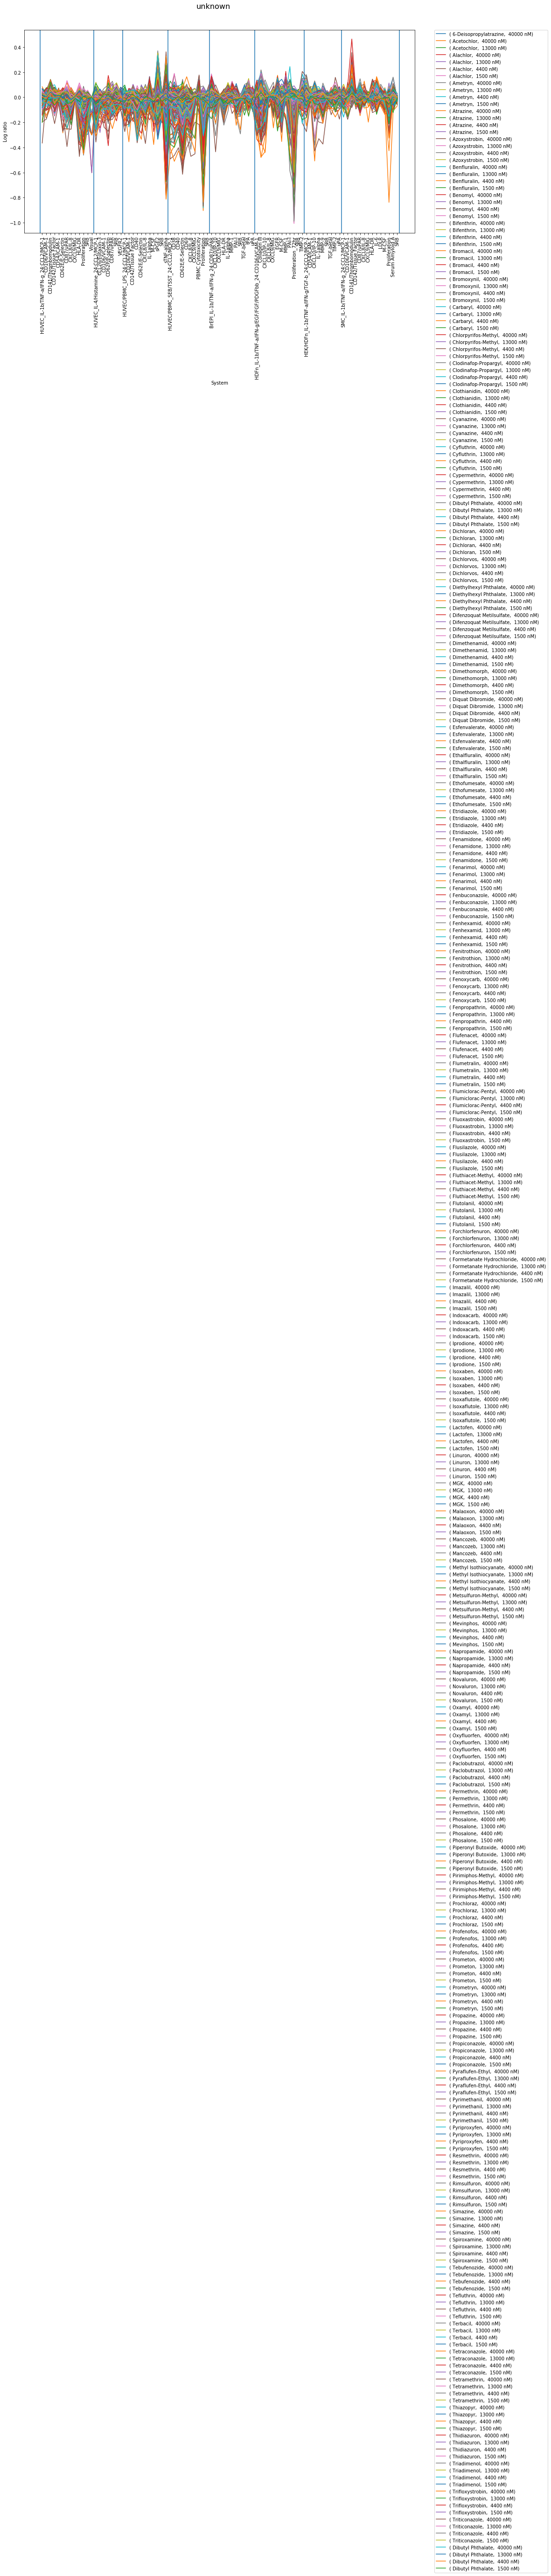

In [24]:
# plot unknown profiles

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 100
pld = pr.parse_profiles(keep_column_names=False, drop_profiles=True)
#pld = unknown[data.columns.values[1:]]

ax = pld.loc['unknown'].T.plot(
    figsize=(15,8),
    sharey=True,
    subplots=False,
    x=pld.columns.get_level_values(0));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
x, x_labels, v_line_positions = pr.v_line_positions();
plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('Log ratio');
plt.suptitle('unknown', fontsize = 16)
# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)
plt.show()

In [25]:
predictions = best_clf.predict(unknown)
dv = best_clf.decision_function(unknown)

predictions = pdf({'Prediction': predictions, 'Decision Value':dv , 'Target Profiles': target_profile_names})
pd.options.display.max_colwidth = 100 # to fit long profile name
pd.options.display.max_rows = 1000
display(predictions)



Decision Value  Prediction  \
agent                      conc                                    
 6-Deisopropylatrazine      40000 nM       -0.673523           0   
 Acetochlor                 40000 nM        1.690731           1   
                            13000 nM       -0.015773           0   
 Alachlor                   40000 nM        1.298240           1   
                            13000 nM       -0.106181           0   
                            4400 nM        -0.576654           0   
                            1500 nM        -0.763476           0   
 Ametryn                    40000 nM       -0.579140           0   
                            13000 nM       -0.488791           0   
                            4400 nM        -0.509053           0   
                            1500 nM        -0.591684           0   
 Atrazine                   40000 nM       -0.580653           0   
                            13000 nM       -0.800940           0   
                            4400 nM        -0.791230           0   
                            1500 nM        -0.808420           0   
 Azoxystrobin               40000 nM        0.414158           1   
                            13000 nM       -0.343642           0   
                            4400 nM        -0.612554           0   
                            1500 nM        -0.623036           0   
 Benfluralin                40000 nM        0.634075           1   
                            13000 nM       -0.494570           0   
                            4400 nM        -0.677108           0   
                            1500 nM        -0.696106           0   
 Benomyl                    40000 nM        0.622232           1   
                            13000 nM        0.030949           1   
                            4400 nM        -0.682317           0   
                            1500 nM        -0.769809           0   
 Bifenthrin                 40000 nM        0.793848           1   
                            13000 nM       -0.018582           0   
                            4400 nM        -0.585512           0   
                            1500 nM        -0.696683           0   
 Bromacil                   40000 nM       -0.839293           0   
                            13000 nM       -0.835200           0   
                            4400 nM        -0.858834           0   
                            1500 nM        -0.841805           0   
 Bromoxynil                 40000 nM        0.268382           1   
                            13000 nM       -0.429316           0   
                            4400 nM        -0.475238           0   
                            1500 nM        -0.532347           0   
 Carbaryl                   40000 nM        0.358770           1   
                            13000 nM       -0.476226           0   
                            4400 nM        -0.819012           0   
                            1500 nM        -0.839129           0   
 Chlorpyrifos-Methyl        40000 nM       -0.001821           0   
                            13000 nM       -0.622335           0   
                            4400 nM        -0.588456           0   
                            1500 nM        -0.613542           0   
 Clodinafop-Propargyl       40000 nM       -0.127811           0   
                            13000 nM       -0.449928           0   
                            4400 nM        -0.716775           0   
                            1500 nM        -0.742554           0   
 Clothianidin               40000 nM       -0.589551           0   
                            13000 nM       -0.579588           0   
                            4400 nM        -0.642842           0   
                            1500 nM        -0.620510           0   
 Cyanazine                  40000 nM       -0.470589           0   
                            13000 nM       -0.704687           0   
                          

In [26]:
# find matched profiles
# match on 
matches = pd.merge(left=predictions, right=tox_cast, 
                   left_on='Target Profiles', right_on=tox_cast.columns.values.tolist()[0])
#matches = predictions[predictions['Prediction'] == 1].join(tox_cast).iloc[:, 3:]
matches.set_index('Target Profiles', inplace=True)
matches = matches[matches.Prediction == 1].iloc[:, 3:]

print('{} out of {} profiles identified as positive class, or {:.0f} percent'.format(len(matches), len(predictions), 
      100*sum(predictions['Prediction']/len(predictions))))


58 out of 363 profiles identified as positive class, or 16 percent


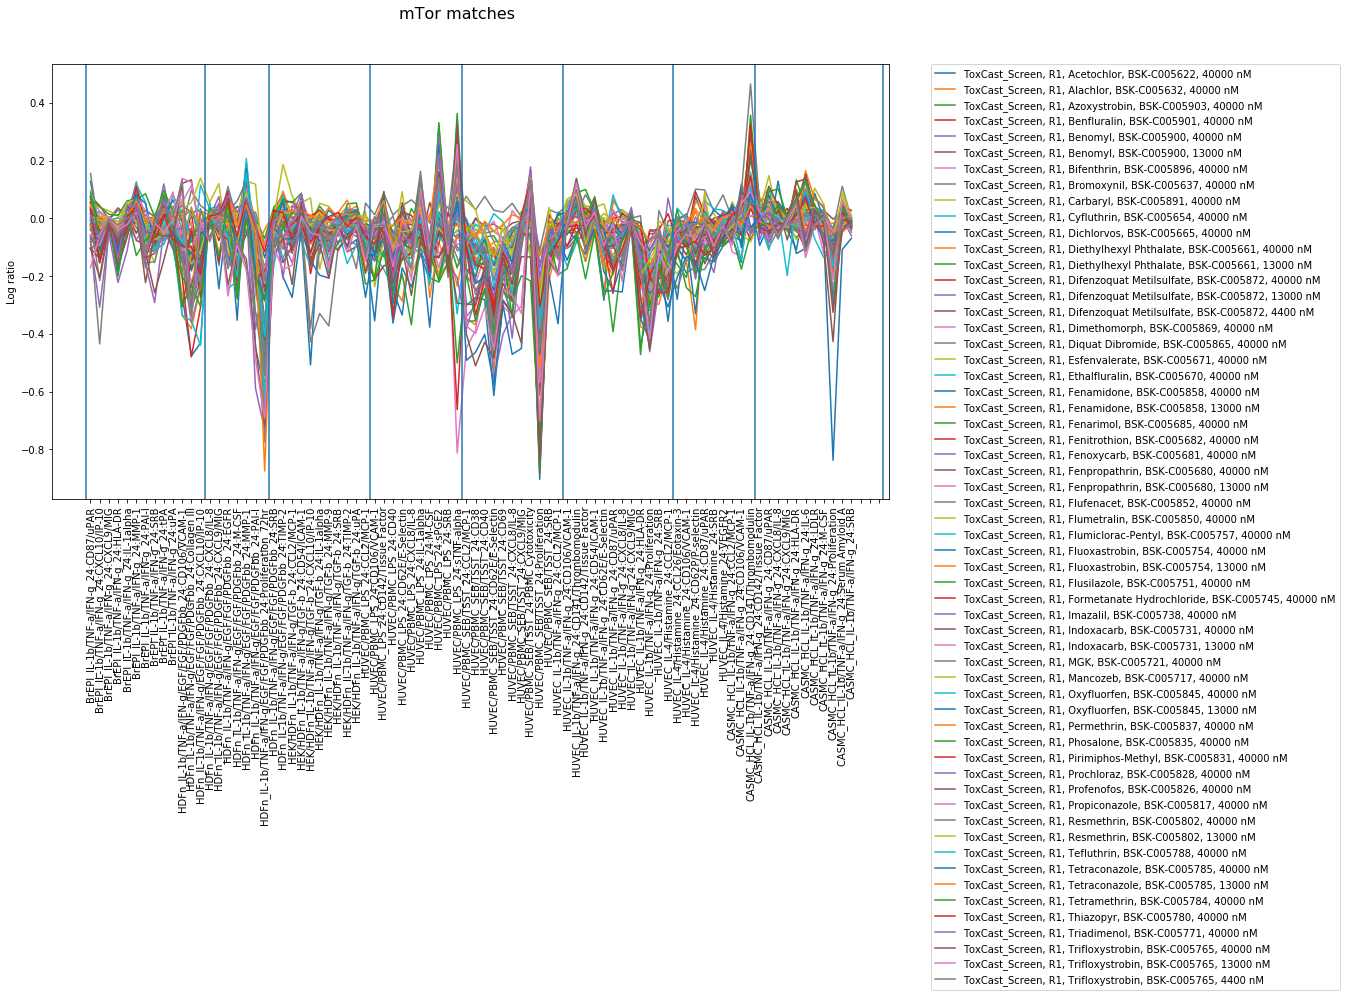

In [31]:
# plot matched profiles

ax = matches.T.plot(
    figsize=(15,8),
    sharey=True,
    subplots=False,
    x=matches.columns.get_level_values(0));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
x, x_labels, v_line_positions = pr.v_line_positions();
x_labels = matches.columns.values
plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('Log ratio');
plt.suptitle('mTor matches', fontsize = 16)
# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)
plt.show()

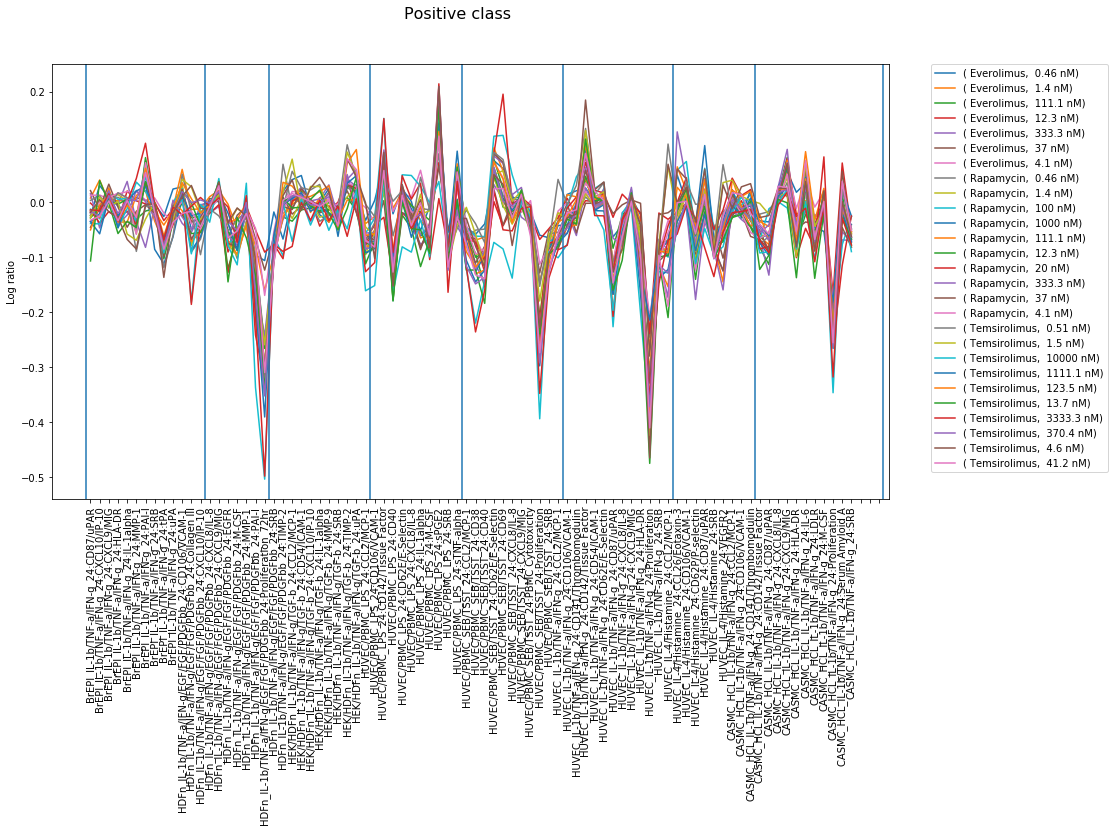

In [32]:
# plot matched profiles
pc = pos_class.iloc[:,1:]
ax = pc.T.plot(
    figsize=(15,8),
    sharey=True,
    subplots=False,
    x=pc.columns.get_level_values(0));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
x, x_labels, v_line_positions = pr.v_line_positions();
x_labels = pc.columns.values
plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('Log ratio');
plt.suptitle('Positive class', fontsize = 16)
# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)
plt.show()


# Conclusion
The table below summarizes the agents that the SVM model found belonging to the mechanism. Decision value is the distance of the profile from the hyperplane. Prediction = 1 means that the profile is in the positive class.

In [41]:
pp = predictions[predictions.Prediction.isin([1])][['Target Profiles', 'Decision Value']].sort_values('Decision Value',ascending=False)
pp

,,Target Profiles,Decision Value
agent,conc,,
Trifloxystrobin,40000 nM,"ToxCast_Screen, R1, Trifloxystrobin, BSK-C005765, 40000 nM",1.898918
Prochloraz,40000 nM,"ToxCast_Screen, R1, Prochloraz, BSK-C005828, 40000 nM",1.725521
Acetochlor,40000 nM,"ToxCast_Screen, R1, Acetochlor, BSK-C005622, 40000 nM",1.690731
Trifloxystrobin,13000 nM,"ToxCast_Screen, R1, Trifloxystrobin, BSK-C005765, 13000 nM",1.515764
Fluoxastrobin,40000 nM,"ToxCast_Screen, R1, Fluoxastrobin, BSK-C005754, 40000 nM",1.305753
Alachlor,40000 nM,"ToxCast_Screen, R1, Alachlor, BSK-C005632, 40000 nM",1.298240
Tetramethrin,40000 nM,"ToxCast_Screen, R1, Tetramethrin, BSK-C005784, 40000 nM",1.029802
Profenofos,40000 nM,"ToxCast_Screen, R1, Profenofos, BSK-C005826, 40000 nM",1.017529
Fenarimol,40000 nM,"ToxCast_Screen, R1, Fenarimol, BSK-C005685, 40000 nM",0.962947


In [38]:
# Write predictions to Execel file
pp
pp.to_excel(mechanism + '.xlsx')